## Librerias

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from joblib import dump, load

In [5]:
original = pd.read_csv("winequality-red.csv")
df = original.copy()
df.sample(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1257,7.0,0.580,0.28,4.8,0.085,12.0,69.0,0.99633,3.32,0.70,11.0,6
1010,8.9,0.280,0.45,1.7,0.067,7.0,12.0,0.99354,3.25,0.55,12.3,7
881,7.6,0.715,0.00,2.1,0.068,30.0,35.0,0.99533,3.48,0.65,11.4,6
575,12.3,0.270,0.49,3.1,0.079,28.0,46.0,0.99930,3.20,0.80,10.2,6


In [7]:
df.sample(50)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1515,6.9,0.840,0.21,4.10,0.074,16.0,65.0,0.99842,3.53,0.72,9.25,6
1339,7.5,0.510,0.02,1.70,0.084,13.0,31.0,0.99538,3.36,0.54,10.50,6
744,11.1,0.390,0.54,2.70,0.095,21.0,101.0,1.00010,3.13,0.51,9.50,5
564,13.0,0.470,0.49,4.30,0.085,6.0,47.0,1.00210,3.30,0.68,12.70,6
964,8.5,0.470,0.27,1.90,0.058,18.0,38.0,0.99518,3.16,0.85,11.10,6
179,8.8,0.610,0.14,2.40,0.067,10.0,42.0,0.99690,3.19,0.59,9.50,5
1407,6.0,0.510,0.00,2.10,0.064,40.0,54.0,0.99500,3.54,0.93,10.70,6
1177,7.1,0.660,0.00,2.40,0.052,6.0,11.0,0.99318,3.35,0.66,12.70,7
1472,7.6,0.350,0.60,2.60,0.073,23.0,44.0,0.99656,3.38,0.79,11.10,6
377,9.4,0.270,0.53,2.40,0.074,6.0,18.0,0.99620,3.20,1.13,12.00,7


## Data Cleaning

In [8]:
# Nulos / Duplicdos / Outliers
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
duplicados = df.duplicated().sum()
print(f"Hay {duplicados} valores duplicados")

Hay 240 valores duplicados


In [10]:
df.drop_duplicates(inplace = True)

In [11]:
duplicados = df.duplicated().sum()
print(f"Hay {duplicados} valores duplicados")

Hay 0 valores duplicados


### **Creamos variable a predecir a partir de "quality"**
#### - La "clase" a predecir será 1 si la "quality" es mayor a 7

In [44]:
df["clase"] = 1*(df["quality"] > 6)
df.sample(4)
print(df.shape)

(1359, 13)


In [45]:
df["clase"].value_counts()

clase
0    1175
1     184
Name: count, dtype: int64

In [46]:
df.drop(columns = "quality", inplace = True)

### **Creacion del mejor modelo final**

### Modelo mediante KFOLD

In [47]:
X=df.drop(columns=['clase'],inplace=False)
y=df['clase']

In [48]:
my_kfold = KFold(n_splits = 30)

## Evaluar modelos

### **1.1 Logistic Regression**

In [49]:
estandarizador = StandardScaler()
LR = LogisticRegression()
accuracis = []
precisions = []
recalls = []
f1s = []

for i_train, i_test in my_kfold.split(df):
    X_train, X_test = X.iloc[i_train], X.iloc[i_test]
    y_train, y_test = y.iloc[i_train], y.iloc[i_test]
    estandarizador.fit(X_train)
    X_train_std=estandarizador.transform(X_train)
    X_test_std=estandarizador.transform(X_test)
    
    LR.fit(X_train_std,y_train)
    predictions = LR.predict(X_test_std)
    
    accuracis.append(accuracy_score(y_test, predictions))
    precisions.append(precision_score(y_test, predictions))
    recalls.append(recall_score(y_test, predictions))
    f1s.append(f1_score(y_test, predictions))

c:\Users\GuillemEdoBertran\.conda\envs\ML_IMPELIA\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\GuillemEdoBertran\.conda\envs\ML_IMPELIA\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\GuillemEdoBertran\.conda\envs\ML_IMPELIA\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [50]:
metricas_LR=[]
metricas_LR.append(sum(accuracis)/len(accuracis))
metricas_LR.append(sum(precisions)/len(precisions))
metricas_LR.append(sum(recalls)/len(recalls))
metricas_LR.append(sum(f1s)/len(f1s))
metricas_LR

[0.8740901771336557,
 0.3758080808080809,
 0.23971656339303402,
 0.2572791179595595]

### **1.2 Decision Tree**

In [51]:
DT = DecisionTreeClassifier()
accuracis = []
precisions = []
recalls = []
f1s = []

for i_train, i_test in my_kfold.split(df):
    X_train, X_test = X.iloc[i_train], X.iloc[i_test]
    y_train, y_test = y.iloc[i_train], y.iloc[i_test]
    
    DT.fit(X_train,y_train)
    predictions = DT.predict(X_test)
    
    accuracis.append(accuracy_score(y_test, predictions))
    precisions.append(precision_score(y_test, predictions))
    recalls.append(recall_score(y_test, predictions))
    f1s.append(f1_score(y_test, predictions))

c:\Users\GuillemEdoBertran\.conda\envs\ML_IMPELIA\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\GuillemEdoBertran\.conda\envs\ML_IMPELIA\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\GuillemEdoBertran\.conda\envs\ML_IMPELIA\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Us

In [52]:
metricas_DT=[]
metricas_DT.append(sum(accuracis)/len(accuracis))
metricas_DT.append(sum(precisions)/len(precisions))
metricas_DT.append(sum(recalls)/len(recalls))
metricas_DT.append(sum(f1s)/len(f1s))
metricas_DT

[0.8215458937198071,
 0.34642440892440896,
 0.35030354177413003,
 0.3150114369099091]

### **1.3 Random Forest**

In [53]:
estandarizador = StandardScaler()
RF = LogisticRegression()
accuracis = []
precisions = []
recalls = []
f1s = []

for i_train, i_test in my_kfold.split(df):
    X_train, X_test = X.iloc[i_train], X.iloc[i_test]
    y_train, y_test = y.iloc[i_train], y.iloc[i_test]
    estandarizador.fit(X_train)
    X_train_std=estandarizador.transform(X_train)
    X_test_std=estandarizador.transform(X_test)
    
    RF.fit(X_train_std,y_train)
    predictions = RF.predict(X_test_std)
    
    accuracis.append(accuracy_score(y_test, predictions))
    precisions.append(precision_score(y_test, predictions))
    recalls.append(recall_score(y_test, predictions))
    f1s.append(f1_score(y_test, predictions))

c:\Users\GuillemEdoBertran\.conda\envs\ML_IMPELIA\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\GuillemEdoBertran\.conda\envs\ML_IMPELIA\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\GuillemEdoBertran\.conda\envs\ML_IMPELIA\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [54]:
metricas_RF=[]
metricas_RF.append(sum(accuracis)/len(accuracis))
metricas_RF.append(sum(precisions)/len(precisions))
metricas_RF.append(sum(recalls)/len(recalls))
metricas_RF.append(sum(f1s)/len(f1s))
metricas_RF

[0.8740901771336557,
 0.3758080808080809,
 0.23971656339303402,
 0.2572791179595595]

### **1.4. Cuarto Modelo k-Nearest Neighbor**

In [55]:
KNN=RandomForestClassifier()
accuracies=[]
precisions=[]
recalls=[]
f1s=[]

for train_index, test_index in my_kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    estandarizador = StandardScaler()
    estandarizador.fit(X_train)
    X_train_std=estandarizador.transform(X_train)
    X_test_std=estandarizador.transform(X_test)
    KNN.fit(X_train,y_train)
    predictions = KNN.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))
    precisions.append(precision_score(y_test, predictions))
    recalls.append(recall_score(y_test, predictions))
    f1s.append(f1_score(y_test, predictions))

c:\Users\GuillemEdoBertran\.conda\envs\ML_IMPELIA\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\GuillemEdoBertran\.conda\envs\ML_IMPELIA\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\GuillemEdoBertran\.conda\envs\ML_IMPELIA\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [56]:
# MODELO KNN
metricas_KNN=[]
metricas_KNN.append(sum(accuracies)/len(accuracies))
metricas_KNN.append(sum(precisions)/len(precisions))
metricas_KNN.append(sum(recalls)/len(recalls))
metricas_KNN.append(sum(f1s)/len(f1s))

print("Métricas KNN")
print("Accuracy",sum(accuracies)/len(accuracies))
print("Precision",sum(precisions)/len(precisions))
print("Recall",sum(recalls)/len(recalls))
print("F1",sum(f1s)/len(f1s))

Métricas KNN
Accuracy 0.8829146537842193
Precision 0.4603439153439154
Recall 0.2706078997255468
F1 0.31966178483825547


In [57]:
dict={"Logistic Regression":metricas_LR, "DecisionTree":metricas_DT, "RandomForest":metricas_RF , "K-NN":metricas_KNN}
Resultados=pd.DataFrame(dict,index=["Acuracy","Precision","Recall","F1"])
Resultados

,Logistic Regression,DecisionTree,RandomForest,K-NN
Acuracy,0.874090,0.821546,0.874090,0.882915
Precision,0.375808,0.346424,0.375808,0.460344
Recall,0.239717,0.350304,0.239717,0.270608
F1,0.257279,0.315011,0.257279,0.319662


### Creación final "Decision Tree"

In [58]:
DT.fit(X,y)
dump(DT,"modelo_wine.md")

['modelo_wine.md']

### Usamos el modelo

[Text(0.5, 0.9, 'alcohol <= 11.55\ngini = 0.234\nsamples = 1359\nvalue = [1175, 184]\nclass = No calidad'),
 Text(0.25, 0.7, 'volatile acidity <= 0.375\ngini = 0.143\nsamples = 1138\nvalue = [1050, 88]\nclass = No calidad'),
 Text(0.125, 0.5, 'alcohol <= 10.45\ngini = 0.369\nsamples = 205\nvalue = [155, 50]\nclass = No calidad'),
 Text(0.0625, 0.3, 'fixed acidity <= 11.7\ngini = 0.168\nsamples = 108\nvalue = [98, 10]\nclass = No calidad'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'pH <= 3.255\ngini = 0.485\nsamples = 97\nvalue = [57, 40]\nclass = No calidad'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'alcohol <= 9.975\ngini = 0.078\nsamples = 933\nvalue = [895, 38]\nclass = No calidad'),
 Text(0.3125, 0.3, 'volatile acidity <= 0.385\ngini = 0.019\nsamples = 509\nvalue = [504, 5]\nclass = No calidad'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (...)  \n'),
 Tex

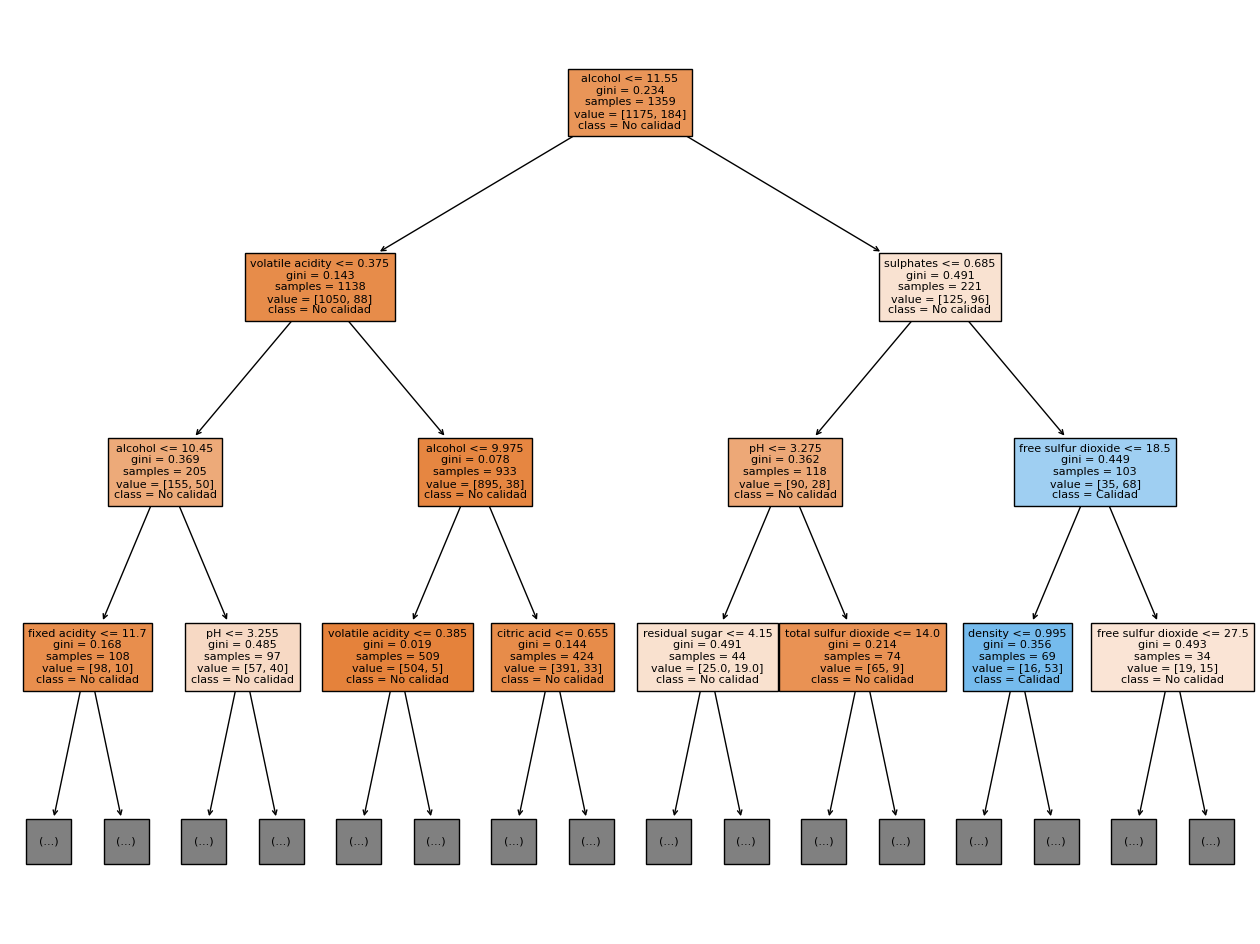

In [65]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(16,12))
plot_tree(DT, feature_names=df.columns, fontsize=8, filled=True, max_depth = 3,
class_names=['No calidad', 'Calidad'])